# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "worldcities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [106]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [107]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


city_names = []

print("Beginning Data Retrieval         ")
print("---------------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = url + "&q=" + (city)
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()
        
        citylat = city_weather["coord"]["lat"]
        citylng = city_weather["coord"]["lon"]
        citymaxtemp = city_weather["main"]["temp_max"]
        cityhumid = city_weather["main"]["humidity"]
        cityclouds = city_weather["clouds"]["all"]
        citywind = city_weather["wind"]["speed"]
        citycountry = city_weather["sys"]["country"]
        citydate = city_weather["dt"]
        
        city_names.append({"City": city,
                         "Lat": citylat,
                         "Lng": citylng,
                         "Max Temp": citymaxtemp,
                         "Humidity": cityhumid,
                         "Cloudiness": cityclouds,
                         "Wind Speed": citywind,
                         "Country": citycountry,
                         "Date": citydate})
        
    except:
            print("City not found.  Skipping...")
            pass
        
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")
    



Beginning Data Retrieval         
---------------------------------
Processing Record 1 of Set 1 | shambu
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | never
Processing Record 4 of Set 1 | poum
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | champerico
Processing Record 8 of Set 1 | ngukurr
City not found.  Skipping...
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | atar
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | taree
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | taolanaro
City not found.  Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | illoqqortoormiut
City not found.  Skipping...
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | umzim

Processing Record 33 of Set 4 | mezen
Processing Record 34 of Set 4 | jutai
Processing Record 35 of Set 4 | asau
City not found.  Skipping...
Processing Record 36 of Set 4 | zhaotong
Processing Record 37 of Set 4 | vaini
Processing Record 38 of Set 4 | cabedelo
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | fort nelson
Processing Record 42 of Set 4 | kieta
Processing Record 43 of Set 4 | grindavik
Processing Record 44 of Set 4 | adelaide
Processing Record 45 of Set 4 | redcar
Processing Record 46 of Set 4 | batagay-alyta
Processing Record 47 of Set 4 | lamar
Processing Record 48 of Set 4 | bryan
Processing Record 49 of Set 4 | mehamn
Processing Record 0 of Set 5 | laguna
Processing Record 1 of Set 5 | beyneu
Processing Record 2 of Set 5 | paradwip
City not found.  Skipping...
Processing Record 3 of Set 5 | xining
Processing Record 4 of Set 5 | hay river
Processing Record 5 of Set 5 | waiouru
Processing Record 6 of Set 5 | di

Processing Record 17 of Set 8 | winslow
Processing Record 18 of Set 8 | marfino
Processing Record 19 of Set 8 | elko
Processing Record 20 of Set 8 | tir pol
City not found.  Skipping...
Processing Record 21 of Set 8 | montrose
Processing Record 22 of Set 8 | hami
Processing Record 23 of Set 8 | waipawa
Processing Record 24 of Set 8 | port hedland
Processing Record 25 of Set 8 | birjand
Processing Record 26 of Set 8 | resistencia
Processing Record 27 of Set 8 | tianpeng
Processing Record 28 of Set 8 | murashi
Processing Record 29 of Set 8 | yanchukan
City not found.  Skipping...
Processing Record 30 of Set 8 | torbay
Processing Record 31 of Set 8 | nuuk
Processing Record 32 of Set 8 | imbituba
Processing Record 33 of Set 8 | tecoanapa
Processing Record 34 of Set 8 | cody
Processing Record 35 of Set 8 | khani
Processing Record 36 of Set 8 | sitka
Processing Record 37 of Set 8 | yalutorovsk
Processing Record 38 of Set 8 | kazalinsk
City not found.  Skipping...
Processing Record 39 of Set 

Processing Record 0 of Set 12 | bandiagara
Processing Record 1 of Set 12 | londoko
City not found.  Skipping...
Processing Record 2 of Set 12 | mayo
Processing Record 3 of Set 12 | talara
Processing Record 4 of Set 12 | eagle pass
Processing Record 5 of Set 12 | samarai
Processing Record 6 of Set 12 | emba
Processing Record 7 of Set 12 | sorrento
Processing Record 8 of Set 12 | goderich
Processing Record 9 of Set 12 | ereymentau
Processing Record 10 of Set 12 | vardo
Processing Record 11 of Set 12 | black diamond
Processing Record 12 of Set 12 | mendi
Processing Record 13 of Set 12 | trat
Processing Record 14 of Set 12 | henties bay
Processing Record 15 of Set 12 | kirakira
Processing Record 16 of Set 12 | mwanza
Processing Record 17 of Set 12 | gravdal
Processing Record 18 of Set 12 | puerto del rosario
Processing Record 19 of Set 12 | ransang
City not found.  Skipping...
Processing Record 20 of Set 12 | tosya
Processing Record 21 of Set 12 | papara
Processing Record 22 of Set 12 | ma

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [108]:
city_pd = pd.DataFrame(city_names)

lats = city_pd["Lat"]
max_temp = city_pd["Max Temp"]
humidity = city_pd["Humidity"]
cloudiness = city_pd["Cloudiness"]
winds = city_pd["Wind Speed"]

city_pd.to_csv("City_Output.csv")

city_pd.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [109]:
city_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,shambu,76,ET,1543810856,85,9.57,37.10,54.69,2.91
1,cabo san lucas,90,MX,1543805460,64,22.89,-109.91,71.60,4.70
2,never,44,RU,1543810856,56,53.98,124.16,-2.15,8.16
3,poum,48,MK,1543809684,88,41.28,20.71,29.04,1.68
4,hobart,75,AU,1543807920,48,-42.88,147.33,60.80,20.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

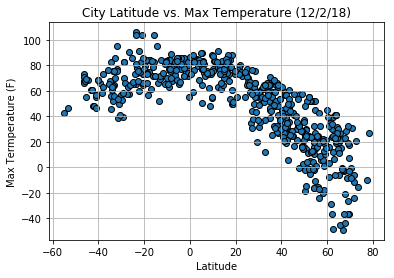

In [114]:
plt.scatter(lats, max_temp, edgecolor="black", marker="o")

plt.title("City Latitude vs. Max Temperature (12/2/18)")
plt.ylabel("Max Termperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("latvstemp.png")


#### Latitude vs. Humidity Plot

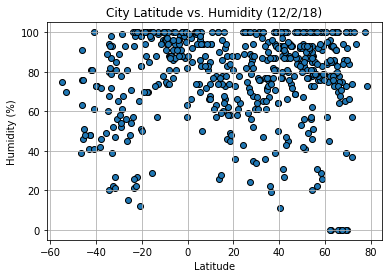

In [115]:
plt.scatter(lats, humidity, edgecolor="black", marker="o")

plt.title("City Latitude vs. Humidity (12/2/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("latvshumidity.png")

#### Latitude vs. Cloudiness Plot

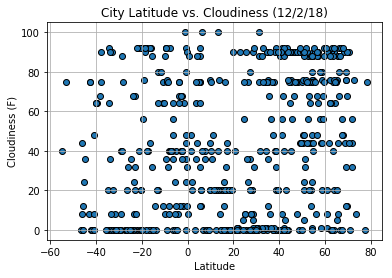

In [116]:
plt.scatter(lats, cloudiness, edgecolor="black", marker="o")

plt.title("City Latitude vs. Cloudiness (12/2/18)")
plt.ylabel("Cloudiness (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("latvscloudiness.png")


#### Latitude vs. Wind Speed Plot

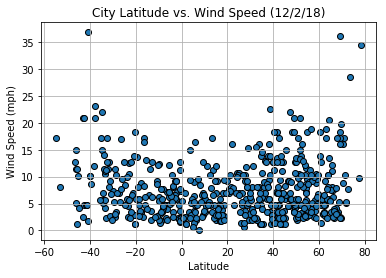

In [117]:
plt.scatter(lats, winds, edgecolor="black", marker="o")

plt.title("City Latitude vs. Wind Speed (12/2/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("latvswind.png")

In [ ]:
# The City Latitude vs Max Temperature supports the notion that temperatures get higher the closer you are to the equator. 
# Most of the high temperatures are at the equator, and as you travel to the north or the south, the temperatures drop the further
# away from the equator the city is.

In [ ]:
# Humidity and Cloudiness do not appear to have a correlation to proximity to the equator. 

In [ ]:
# Wind speed appears to increase the further from the equator the city is.